In [0]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# importing the required packages and loading the .h5 type data file using the h5py package  
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

np.seterr(over='ignore')
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

%matplotlib inline

In [0]:
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'a')

# Check H5 Keys
list(h5f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]
# Close this file
h5f.close()

In [0]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data() 

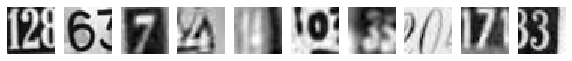

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))



In [0]:
# reshaping the data at hand
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# normalize inputs from 0-255 to 0-1; to be used with the NN
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 32

x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())

# 2000 samples to be used in knn modelling    
x_tr =x_tr[:2000]
x_te =x_te[:2000]
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]


In [0]:
x_train,x_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.25)

In [0]:
KNN = KNeighborsClassifier(7)
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
# print(KNN.score(x_test,y_test))

#### Fully Connected Layer

In [0]:
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None

    def forward(self, X):
        self.X = X
        output = np.dot(self.X, self.W) + self.b
        return output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

#### Rectified Linear Activation Layer

In [0]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

#### Softmax

In [0]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

#### Defining the Cross Entropy Loss

In [0]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

In [0]:
# train_features = train_features.reshape(60000, 784)
# print (train_features.shape)
# test_features = test_features.reshape(10000, 784)
# print (test_features.shape)


# # # normalize inputs from 0-255 to 0-1
# train_features = train_features / 255.0
# test_features = test_features / 255.0

# print (train_targets.shape)
# print (test_targets.shape)

# X_train = train_features
# y_train = train_targets

# X_val = test_features
# y_val = test_targets

### visualizing the first 10 images in the dataset and their labels

label for each of the above image: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


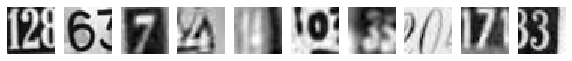

In [0]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    
print('label for each of the above image: %s' % (y_train[0:10]))

### I define the container NN class that enables the forward prop and backward propagation

In [0]:
class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)  + ((Lambda / (2 * y.shape[0])) * np.sum([np.sum(w**2) for w in self.params[0][0]]))
        nextgrad = self.loss_func.backward(out,y) + ((Lambda/y.shape[0]) * np.sum([np.sum(w) for w in self.params[0][0]]))
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

#### Defining the update function (SGD)

In [0]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

#### Defining a function which gives us the minibatches (both the datapoint and the corresponding label)

In [0]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]

        minibatches.append((X_batch, y_batch))
    return minibatches

#### The traning loop

In [0]:
def sgd(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None, Lambda=0, verb=True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Epoch {3}/{4}: Loss = {0} | Training Accuracy = {1}".format(mean_train_loss, train_acc, val_acc, i, epoch))
    return net, val_acc

#### Checking the accuracy of the model 

In [0]:
def check_accuracy(y_true, y_pred):
    count = 0
    for i,j in zip(y_true, y_pred):
        if int(i)==j:
            count +=1
    return float(count)/float(len(y_true))

#### Invoking all

In [0]:
from random import shuffle


## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes))

    nn, val_acc = sgd(nn, X_train , y_train, minibatch_size=1000, epoch=iterations, learning_rate=learning_rate,X_val=X_val, y_val=y_val, Lambda=Lambda, verb=verb)
    return val_acc

In [0]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[3],cmap="gray")
print(classifier.predict(x_te[3]))
plt.figure(figsize=(2,2))
plt.imshow(x_test[2],cmap="gray")
print(classifier.predict(x_te[2]))
plt.figure(figsize=(2,2))
plt.imshow(x_test[33],cmap="gray")
print(classifier.predict(x_te[33]))
plt.figure(figsize=(2,2))
plt.imshow(x_test[59],cmap="gray")
print(classifier.predict(x_te[59]))
plt.figure(figsize=(2,2))
plt.imshow(x_test[36],cmap="gray")
print(classifier.predict(x_te[36]))

In [0]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

NameError: ignored

### Run finer search

In [0]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-5,2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))